In [1]:
%load_ext autoreload
%autoreload 2

from cnn import CNN
from dyn_cnn import DynCNN
from util import Util
from patch import Patch
from fixer import Fixer
from uglify import Uglify

import cPickle as pickle
import os
import mahotas as mh
import numpy as np
import time

import mlproof as mlp


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
tifffile.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tifffile.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
image, prob, mask, gold, rhoana = mlp.Util.read_section('/home/d/data/cylinder/', 250)

Loading z00000250.png


In [9]:
Util.vi(gold, rhoana)

0.37294998439310856

In [3]:
with open('/home/d/nets/MergeNet_larger_border_overlap_cylinder1_dataaugmentation/net.p', 'rb') as f:
    cnn = pickle.load(f)

In [4]:
vi_s, merge_pairs, surenesses = Fixer.splits(cnn,image, prob, rhoana, gold, 
                                                 sureness_threshold=.5,
                                                 verbose=True)

6252 generated in 367.986893177 seconds.
Grouped into 1533 patches in 0.0274460315704 seconds.
Merge loop finished in 462.495042086 seconds.
Before VI: 0.372949984393
Smallest VI: 0.344331472155
Sureness threshold: 0.975017488003


In [13]:
from uitools import UITools

In [ ]:
new_m_s, out_volume, fixes, vi_s30mins = Fixer.splits_global_from_M(cnn, m_s, 
                                                 volume, 
                                                 volume_prob, 
                                                 volume_segmentation, 
                                                 volume_groundtruth)

In [14]:
surenesses.index(0.97495973110198975)

243

In [15]:
len(surenesses)

285

In [16]:
len(merge_pairs)

285

In [17]:
merge_pairs[0]

(437, 442)

In [33]:
state_array = np.array(rhoana)

state_images = []
diff_images = []
diff_images_gt = []

for i,m in enumerate(merge_pairs[:243]):

    l,n = m

    state_array[state_array == n] = l
    
    if (i>0 and i % 30 == 0):
        state_images.append(np.array(state_array))
        diff_images.append(rhoana-state_array)
        diff_images_gt.append(gold-state_array)

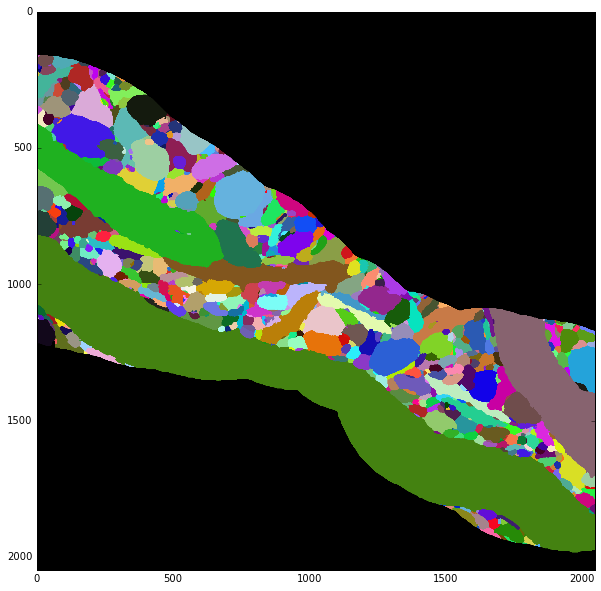

In [24]:
Util.view(state_images[0], large=True)

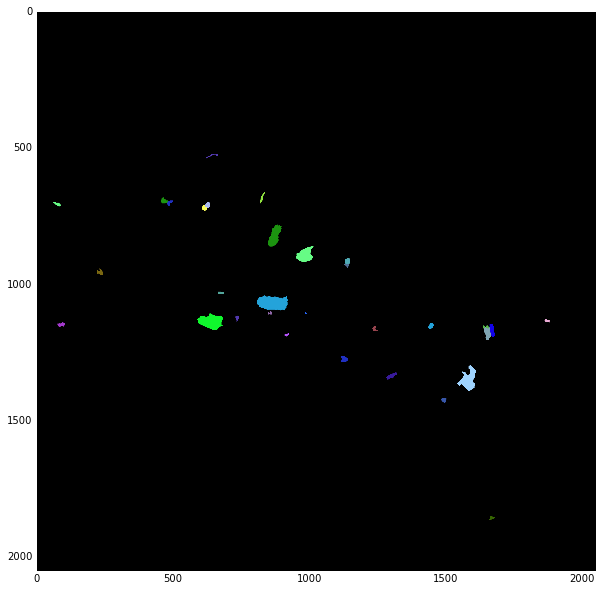

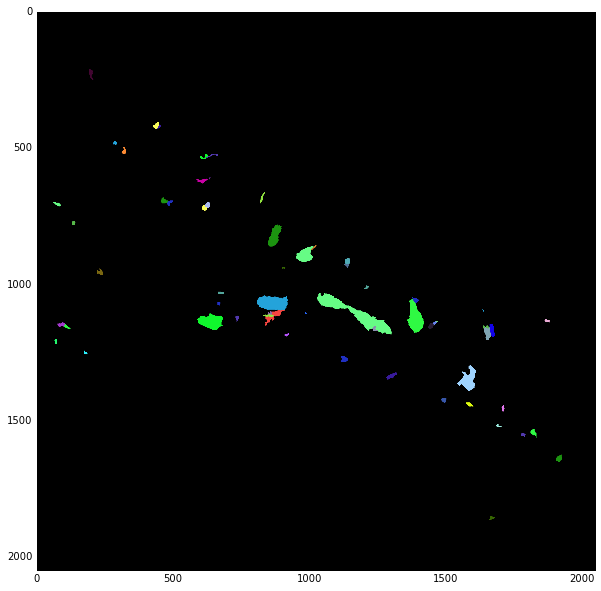

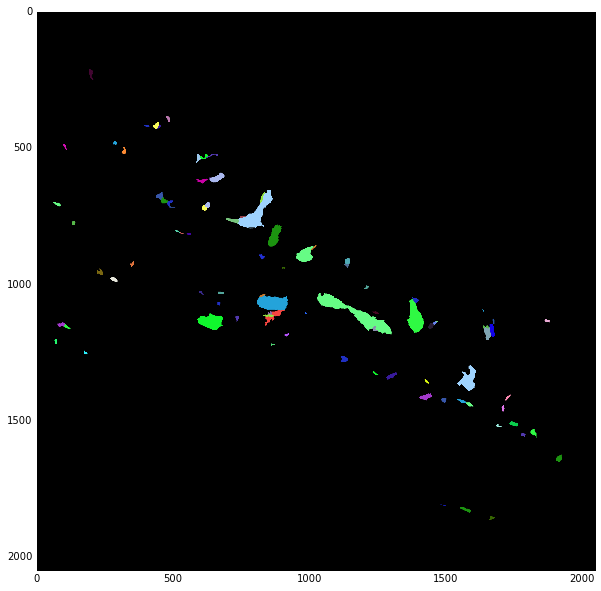

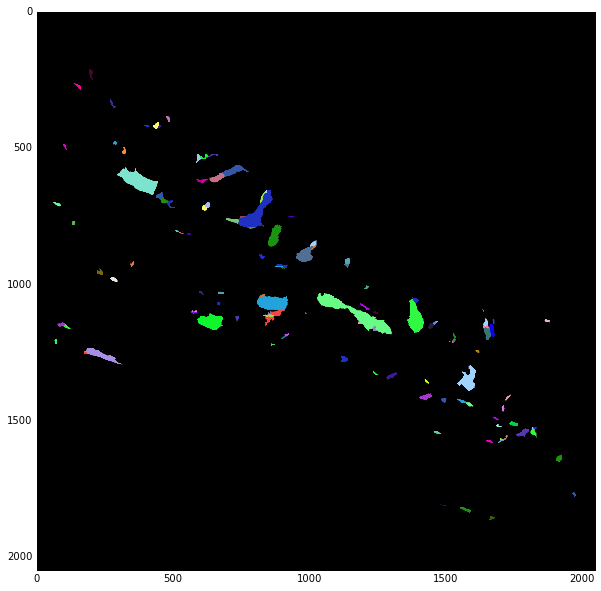

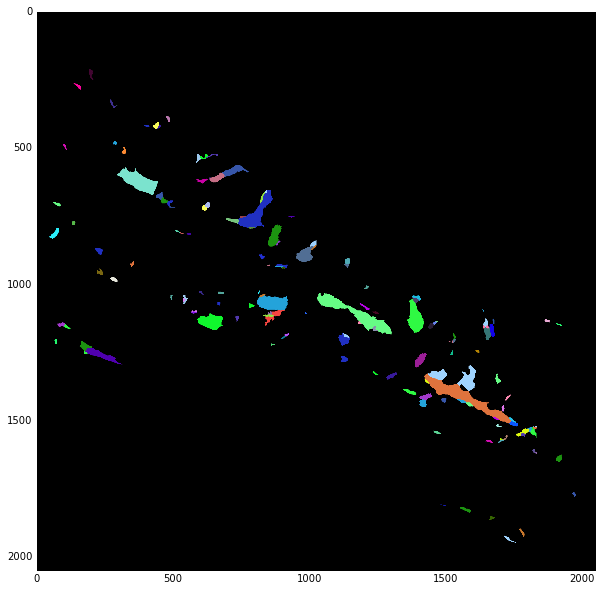

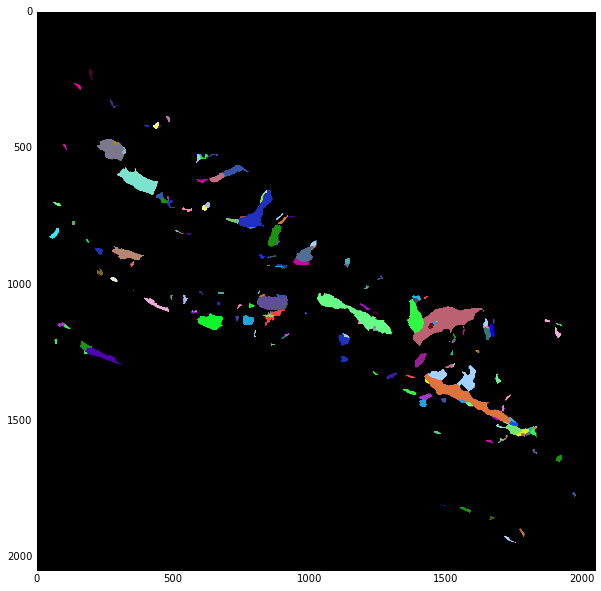

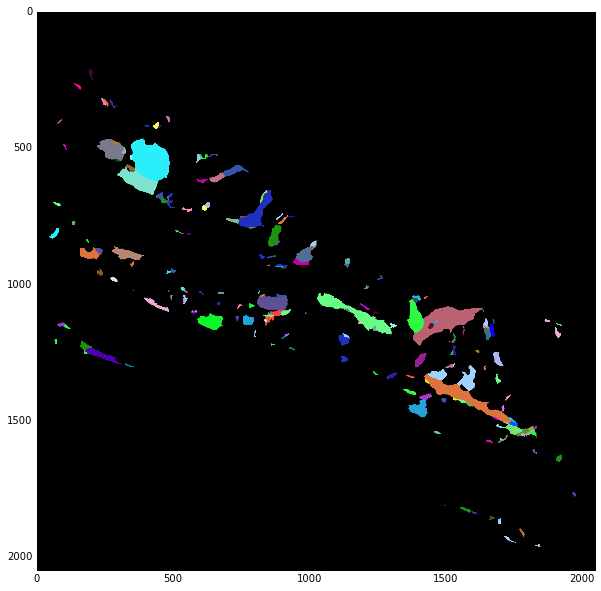

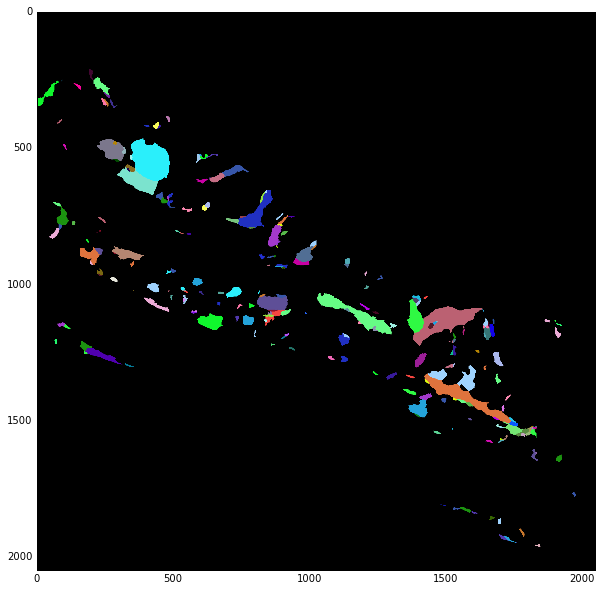

In [25]:
for d in diff_images:
    Util.view(d, large=True)

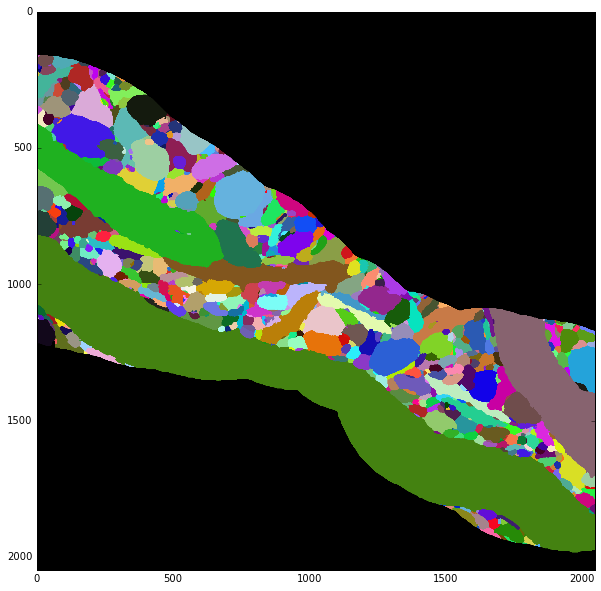

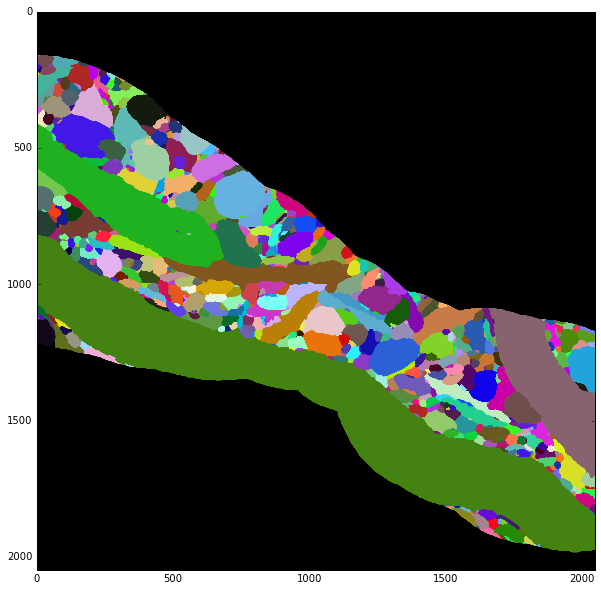

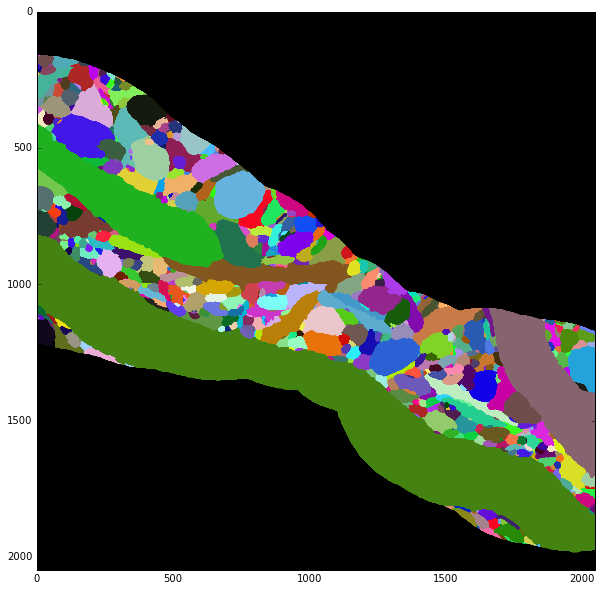

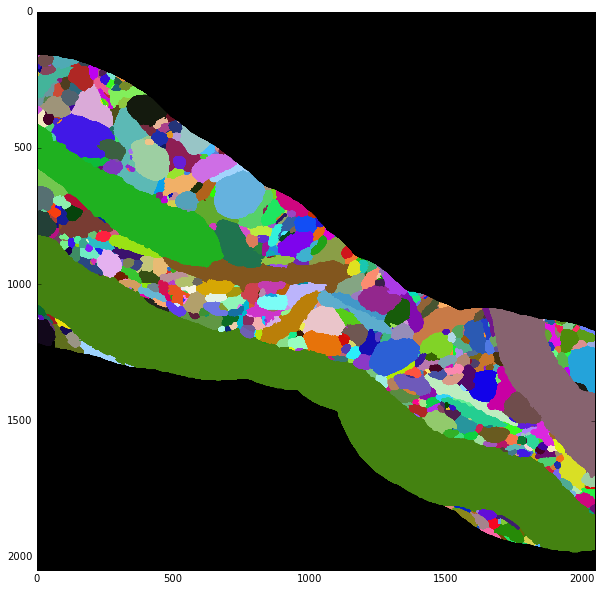

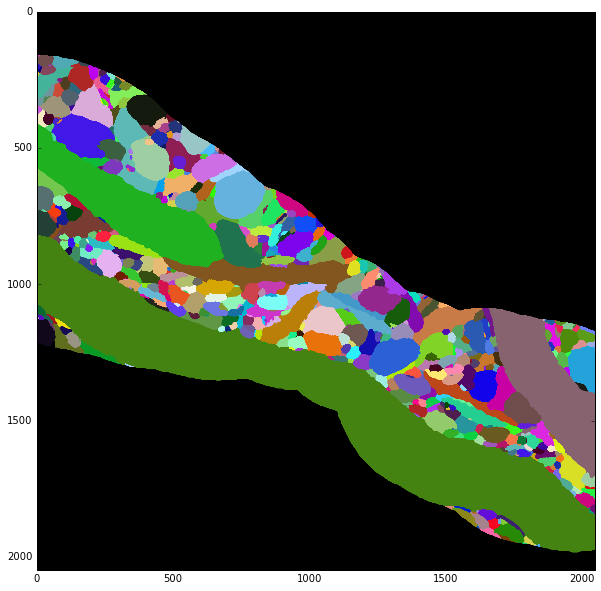

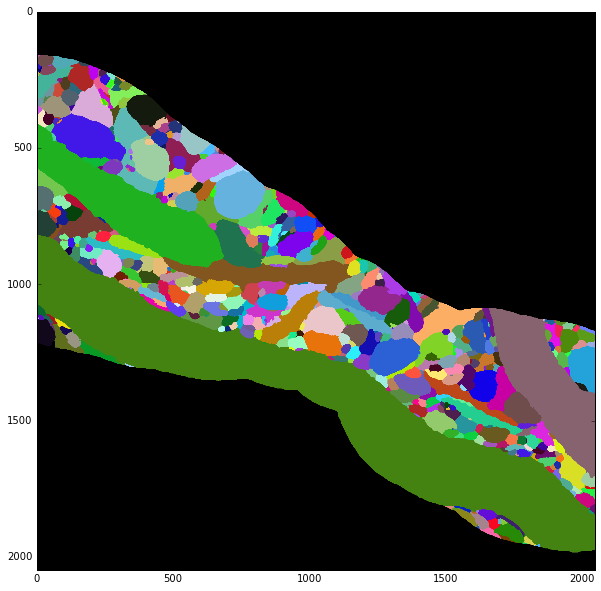

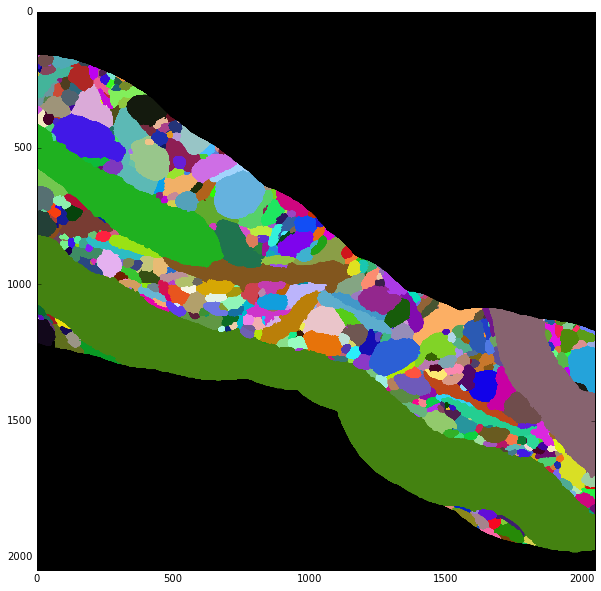

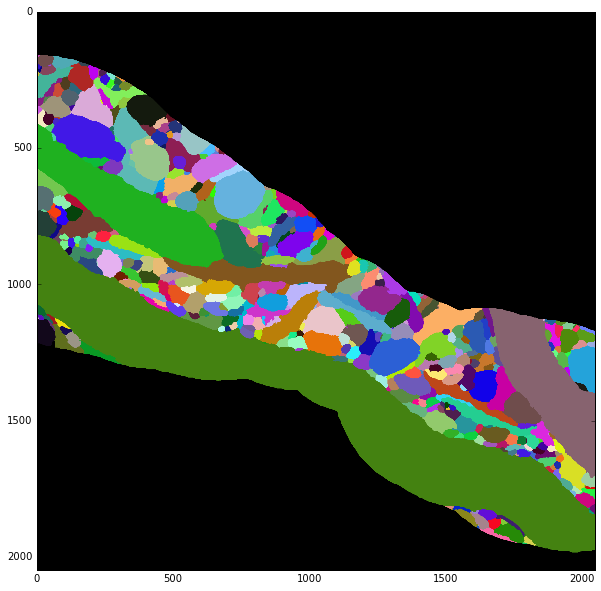

In [30]:
for i,s in enumerate(state_images):
    Util.view(s, large=True, filename=str(i)+'.png')

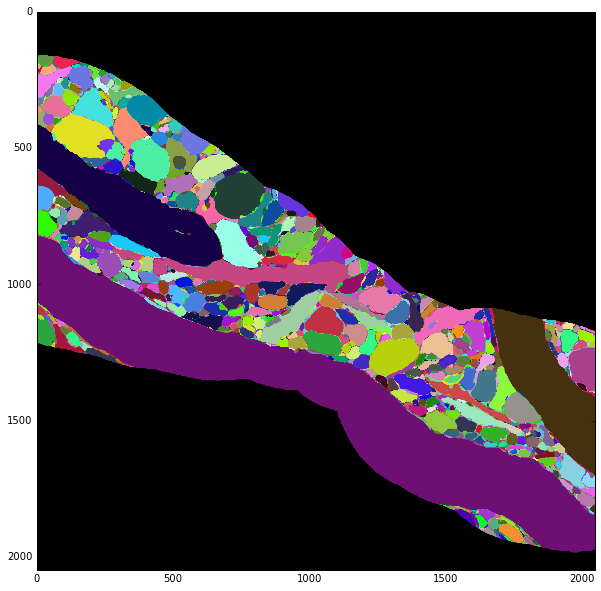

In [37]:
Util.view(diff_images_gt[0],large=True)